<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/unet_RGB_8_portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/"

'107.1 syllabus 1SAY1920 FINAL.gdoc'
 11_input_flipped_horizontal.png
 11_input_flipped_vertical.jpg
 11_input.png
 11_input_rotated_180_flipped_horizontal.png
 11_input_rotated_180_flipped_vertical.jpg
 11_input_rotated_180.png
 11_input_rotated_270_flipped_horizontal.png
 11_input_rotated_270_flipped_vertical.jpg
 11_input_rotated_270.png
 11_input_rotated_90_flipped_horizontal.png
 11_input_rotated_90_flipped_vertical.jpg
 11_input_rotated_90.png
 11_output_flipped_horizontal.png
 11_output_flipped_vertical.jpg
 11_output.png
 11_output_rotated_180_flipped_horizontal.png
 11_output_rotated_180_flipped_vertical.jpg
 11_output_rotated_180.png
 11_output_rotated_270_flipped_horizontal.png
 11_output_rotated_270_flipped_vertical.jpg
 11_output_rotated_270.png
 11_output_rotated_90_flipped_horizontal.png
 11_output_rotated_90_flipped_vertical.jpg
 11_output_rotated_90.png
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
'1H-04 Narag et a

## Installing packages

In [3]:
import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image, ImageOps
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import cv2
from skimage import color

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876
from sklearn.model_selection import train_test_split

## Defining functions

In [4]:
def zoom_and_resize(img, zoom_factor):
    height, width = img.shape[:2]
    crop_top = int((height - height / zoom_factor) / 2)# Calculate the region to crop around the center
    crop_bottom = int(height - crop_top)
    crop_left = int((width - width / zoom_factor) / 2)
    crop_right = int(width - crop_left)
    cropped_image = img[crop_top:crop_bottom, crop_left:crop_right]    # Crop the image
    resized_image = cv2.resize(cropped_image, (width, height))# Resize the zoomed image back to the original dimensions
    return resized_image

def crop(im):
    width, height = im.size
    data = []
    step = int(size * 0.80)  # Adjust the step size for cropping
    for j in range(0, height, step):
        for i in range(0, width, step):
            if i + size <= width and j + size <= height:
                im1 = im.crop((i, j, i + size, j + size))
                im1 = np.array(im1).astype(np.float32)
                data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                #im1 = np.rot90(im1)
                #data.append(im1/255)
                for z in zoom_factor:
                    zoomed_img = zoom_and_resize(im1, z)
                    data.append(zoomed_img/255)
    return data

def contrast_stretch(image):
    img_array = np.array(image)
    for i in range(3):  # 3 channels: Red, Green, Blue
        # Compute min and max pixel intensity values for the channel
        min_val = np.min(img_array[:,:,i])
        max_val = np.max(img_array[:,:,i])
        # Apply contrast stretching
        img_array[:,:,i] = (img_array[:,:,i] - min_val) * (255.0 / (max_val - min_val))
    # Convert numpy array back to PIL Image
    stretched_image = Image.fromarray(np.uint8(img_array))
    return stretched_image

## Preparing the training dataset

In [5]:
size = 8
model_number = size

zoom_factor = [1.5,2.0]
input = []
output = []

input_folder_path = file_path + 'Training/portion only/input_b/'
output_folder_path = file_path + 'Training/portion only/output_b/'

# List all files in the directory and sort them alphabetically
input_files = sorted(os.listdir(input_folder_path))
output_files = sorted(os.listdir(output_folder_path))


for image_file in input_files:
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = crop(image)
    input.extend(image)

for image_file in output_files:
    image_path = os.path.join(output_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = crop(image)
    output.extend(image)
input = np.array(input)
output = np.array(output)

print("Done reading the input of size = ", input.shape)
print("Done reading the output of size = ", output.shape)

# Split the data into training and testing sets
train_input, test_input, train_output, test_output = train_test_split(
    input, output, test_size=0.2, random_state=42)

print("Done reading the train input of size = ", train_input.shape)
print("Done reading the test input of size = ", test_input.shape)
print("Done reading the train output of size = ", train_input.shape)
print("Done reading the test output of size = ", test_input.shape)

input = []
output = []

Done reading the input of size =  (18618, 8, 8, 3)
Done reading the output of size =  (18618, 8, 8, 3)
Done reading the train input of size =  (14894, 8, 8, 3)
Done reading the test input of size =  (3724, 8, 8, 3)
Done reading the train output of size =  (14894, 8, 8, 3)
Done reading the test output of size =  (3724, 8, 8, 3)


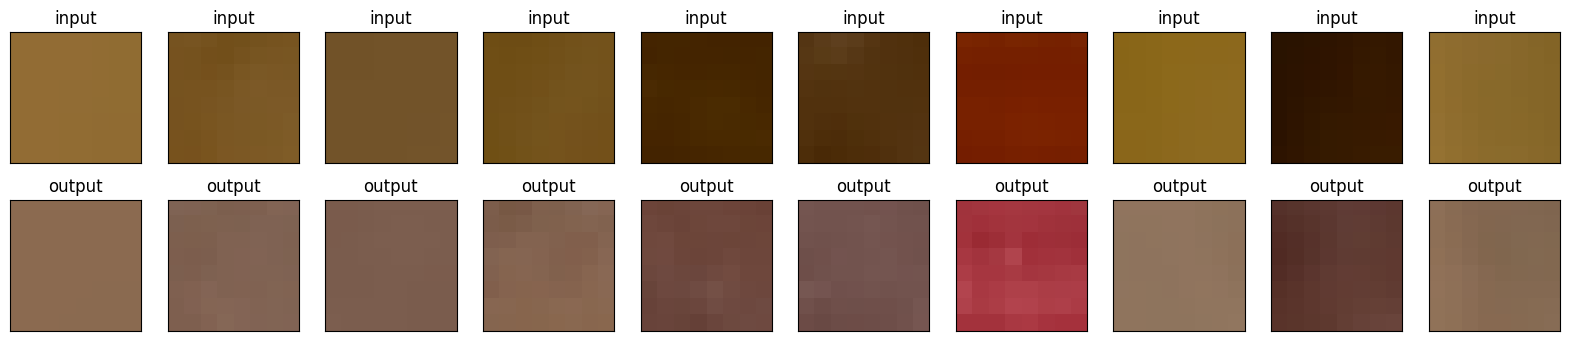

In [6]:
N = 1000
n = 10
plt.figure(figsize=(20, 4))
for i in range(0,10):
    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+N]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+N]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Creating the Unet model

In [7]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

# SSIM loss function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

def unet_model(input_shape=(size, size, 3)):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)

    #conv2 = Conv2D(16, 3, activation='relu', padding='same', strides=2)(conv1)
    #conv2 = Conv2D(16, 3, activation='relu', padding='same')(conv2)

    #conv3 = Conv2D(32, 3, activation='relu', padding='same', strides=2)(conv2)
    #conv3 = Conv2D(32, 3, activation='relu', padding='same')(conv3)

    #conv4 = Conv2D(64, 3, activation='relu', padding='same', strides=2)(conv3)
    #conv4 = Conv2D(64, 3, activation='relu', padding='same')(conv4)

    #conv5 = concatenate([Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same')(conv4), conv3], axis=-1)
    #conv5 = Conv2D(32, 3, activation='relu', padding='same')(conv5)

    #conv6 = concatenate([Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(conv3), conv2], axis=-1)
    #conv6 = Conv2D(16, 3, activation='relu', padding='same')(conv6)

    #conv7 = concatenate([Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(conv2), conv1], axis=-1)
    #conv7 = Conv2D(8, 3, activation='relu', padding='same')(conv7)

    # Output Layer
    output = Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv1)

    model = Model(inputs=inputs, outputs=output)
    return model

# Usage example:
unet = unet_model()
unet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 3)]         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          896       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 3)           867       
                                                                 
Total params: 11011 (43.01 KB)
Trainable params: 11011 (43.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Unet model

In [8]:
from keras.optimizers import Adam
from tensorflow.keras import layers, losses

opt = Adam(learning_rate=0.0001)
#unet.compile(optimizer=opt, loss=ssim_loss)  # Using SSIM loss function
unet.compile(optimizer=opt, loss=losses.MeanSquaredError())
# Train your model as before
start = time.time()
model = unet.fit(train_input, train_output,
                epochs=100,
                shuffle=True,
                validation_data=(test_input, test_output),batch_size=32)
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

unet.save(file_path + 'Model/portion only/unet_' + str(model_number) + '_rgb')

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + 'Model/portion only/loss_'+ str(model_number) + '_rgb.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path  +'Model/portion only/val_loss_'+ str(model_number)+ '_rgb.csv')

Epoch 1/100
466/466 [==============================] - 8s 7ms/step - loss: 0.0169 - val_loss: 0.0074
Epoch 2/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 3/100
466/466 [==============================] - 2s 3ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/100
466/466 [==============================] - 2s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/100
466/466 [==============================] - 2s 4ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 6/100
466/466 [==============================] - 2s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/100
466/466 [==============================] - 2s 5ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/100
466/466 [==============================] - 2s 5ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/100
466/466 [==============================] - 2s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/100
466/466 [==============================] - 2s 3ms/step - loss: 0.0028 - val_lo

## Testing the model

6/6 [==============================] - 0s 3ms/step


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7db0f85b8a60>)

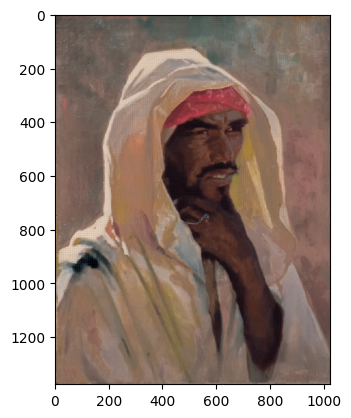

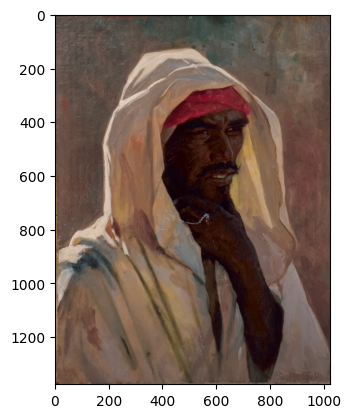

In [9]:
n_size = 8
size = 8

def rgb_L_ab(rgb_image, test_L):
    lab_array = color.rgb2lab(np.array(rgb_image))# Convert RGB to LAB colorspace
    lab_array[..., 0] = test_L #Change L channel to input
    rgb_array = color.lab2rgb(lab_array)# Convert back LAB to RGB colorspace
    rgb_array = (rgb_array*255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_array = Image.fromarray(rgb_array, mode='RGB')# Convert RGB array back to image
    return rgb_array

def crop_(im):
    width, height = im.size
    data = []
    for j in range(0,int(height/n_size)):
        for i in range(0,int(width/n_size)):
            im1 = im.crop((0 + (n_size*i), 0 + (n_size*j), n_size + (n_size*i), n_size + (n_size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data

#----------------READING THE TEST IMAGE--------------------#
filename = str("[08] Conserving a Moroccan Portrait - Before.png")
test = Image.open(file_path+ "Testing/portion only/" + filename).convert('RGB')
test_L = color.rgb2lab(np.array(test))
test_L = test_L[..., 0]
w_dirty, h_dirty = test.size
#----------------------------------------------------------#

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_rgb')

xx = int(w_dirty/n_size)
final=[]

for portion in range(0,xx):
    im1 = test.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty))
    w1, h1 = im1.size
    w = int(w1/n_size)
    h = int(h1/n_size)
    neverbeforeseen = np.array(crop_(im1))
    decoded_imgs = autoencoder.predict(neverbeforeseen)
    col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
    for i in range(2,h):
        col = np.vstack((col,decoded_imgs[i]))
    y = col
    y = (y * 255).astype('uint8')
    if portion == 0:
        final = y
    if portion > 0:
        final = np.hstack((final,y))

#----------------TEST ON FULL RGB--------------------#
final_rgb = final
final_rgb = np.squeeze(final_rgb)
reconstructed_rgb = Image.fromarray(final_rgb)
reconstructed_rgb.save(file_path + "Testing/portion only/"+"Method_1_"+filename)
plt.figure(), plt.imshow(reconstructed_rgb)

#----------------TEST ON L from input and AB from convert RGB2LAB of model--------------------#
final_lab = rgb_L_ab(final, test_L)
final_lab = np.squeeze(final_lab)
reconstructed_lab = Image.fromarray(final_lab)
reconstructed_lab.save(file_path + "Testing/portion only/"+"Method_2_"+filename)
plt.figure(), plt.imshow(reconstructed_lab)